## Objective : In this Notebook we will perform preliminary analysis of data.

In [1]:
#import libraries here; add more as necessary.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sidetable
from pandas import ExcelWriter
from openpyxl import load_workbook
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\psahu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Train Data

In [2]:
train_data=pd.read_csv(r'C:\Users\psahu\Documents\My_projects\online_shoppers\online_shoppers_intention_modified.csv' )

In [3]:
train_data.shape

(12330, 18)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Check if Target feature is Balanced or not

In [5]:
train_data['Revenue'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    84.53%
1    15.47%
Name: Revenue, dtype: object

### Import  Functions_File : (This is a user created module to hold all important functions)

In [6]:
import Functions_File as my_ff

Functions_File is successfully imported.


## EDA

### 1) Check Missing Values

In [7]:
my_ff.total_missing_values(train_data)

,Total,Percentage
Revenue,0,0.0
Weekend,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0


### 2) Check Columns Type

In [8]:
numerical_feats ,categorical_feats = my_ff.column_type(train_data)

print('-------------------------------------------')ac
print('Numeric Features:'  , list(numerical_feats))
print('-------------------------------------------')
print('Categorical Features:'  , list(categorical_feats))

Number of Numerical features:  15
Number of Categorical features:  3
-------------------------------------------
Numeric Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue']
-------------------------------------------
Categorical Features: ['Month', 'VisitorType', 'Weekend']


### 3) Check Total Unique Values 

In [9]:
for var in train_data.columns:
    print(var + '-> ' + str(train_data[var].nunique()) + '   ')

Administrative-> 27   
Administrative_Duration-> 3335   
Informational-> 17   
Informational_Duration-> 1258   
ProductRelated-> 311   
ProductRelated_Duration-> 9551   
BounceRates-> 1872   
ExitRates-> 4777   
PageValues-> 2704   
SpecialDay-> 6   
Month-> 10   
OperatingSystems-> 8   
Browser-> 13   
Region-> 9   
TrafficType-> 20   
VisitorType-> 3   
Weekend-> 2   
Revenue-> 2   


Note : We will  treat below columns as categorical features:
'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'

In [15]:
train_data[['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','Revenue']] = train_data[['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','Revenue']].astype('str')

In [16]:
#Check Column type after change
numerical_feats ,categorical_feats = my_ff.column_type(train_data)

print('-------------------------------------------')
print('Numeric Features:'  , list(numerical_feats))
print('-------------------------------------------')
print('Categorical Features:'  , list(categorical_feats))

Number of Numerical features:  9
Number of Categorical features:  9
-------------------------------------------
Numeric Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
-------------------------------------------
Categorical Features: ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


### 4) Univariate Analysis

#### Numeric Features

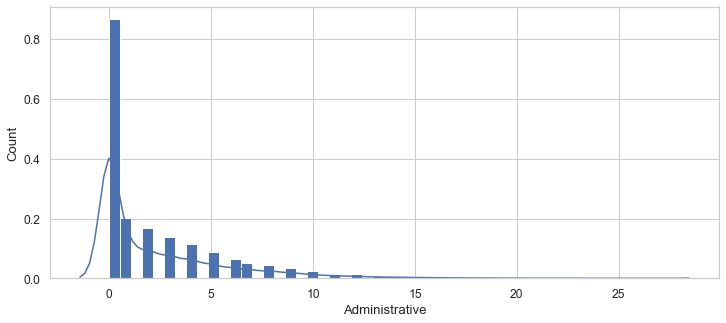

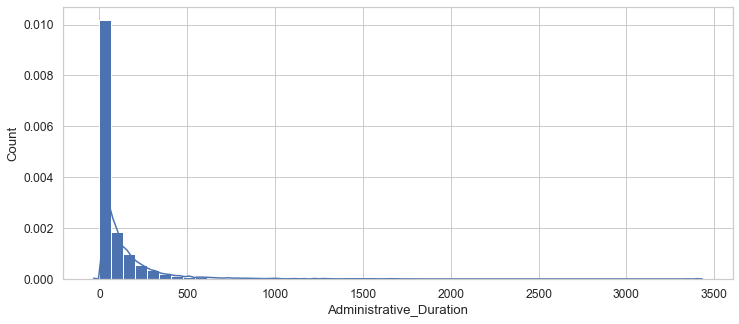

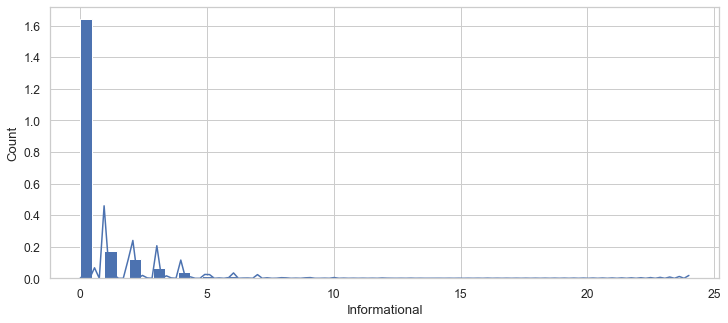

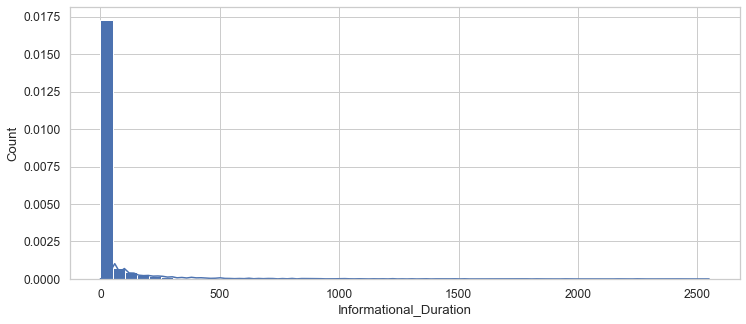

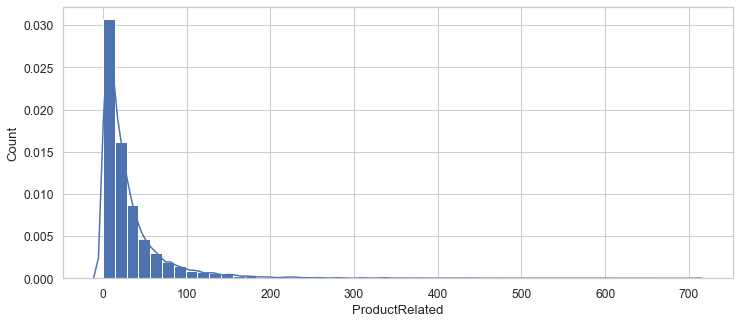

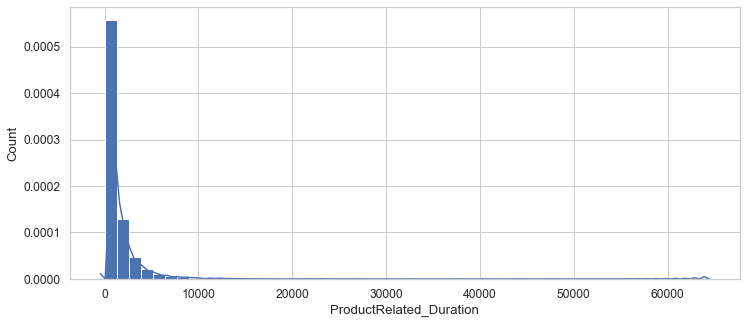

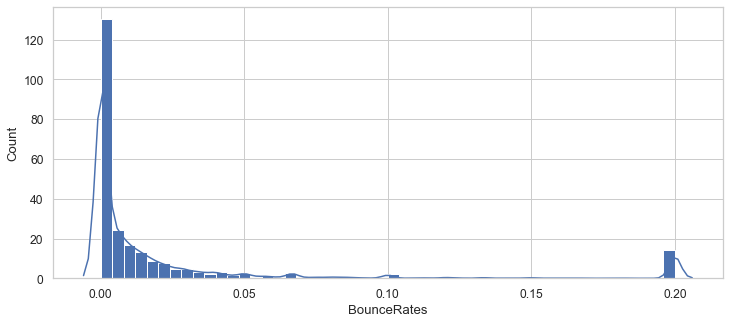

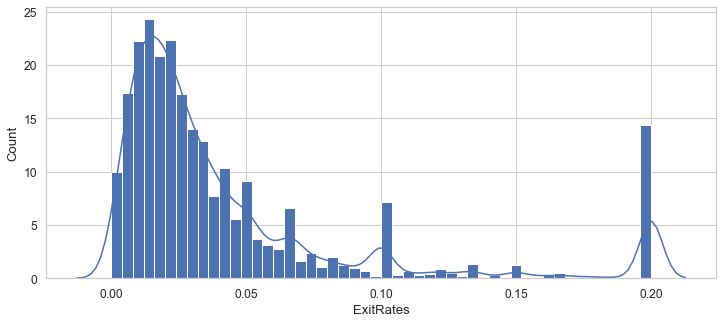

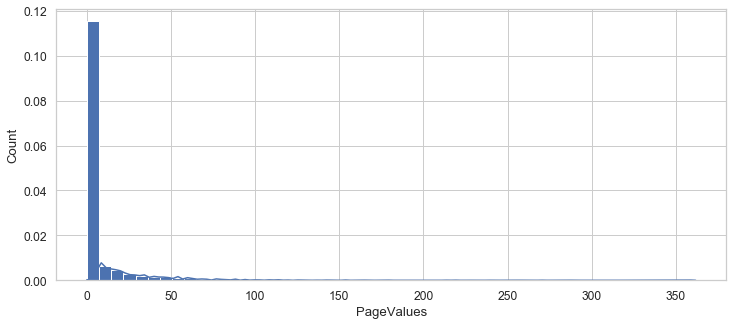

In [17]:
my_ff.univariate_plots(train_data , numerical_feats)

#### Categorical Features

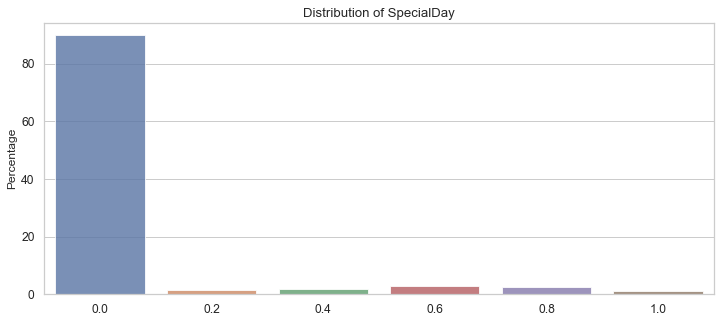

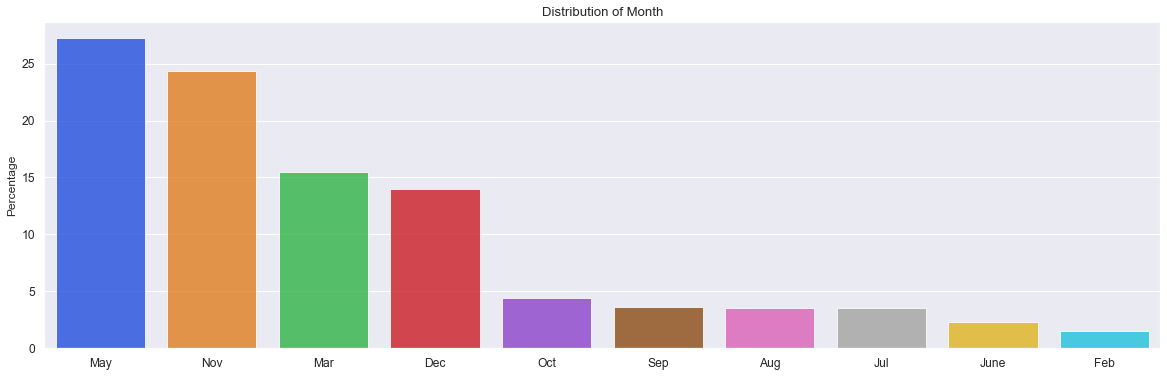

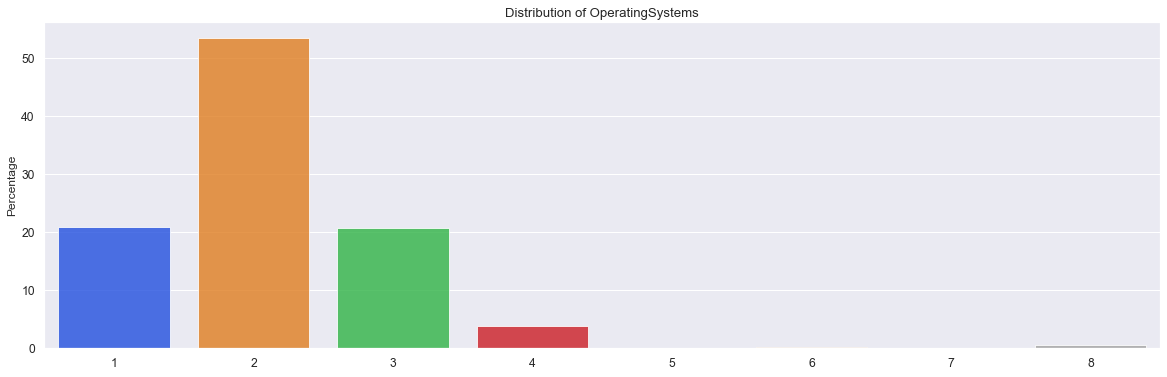

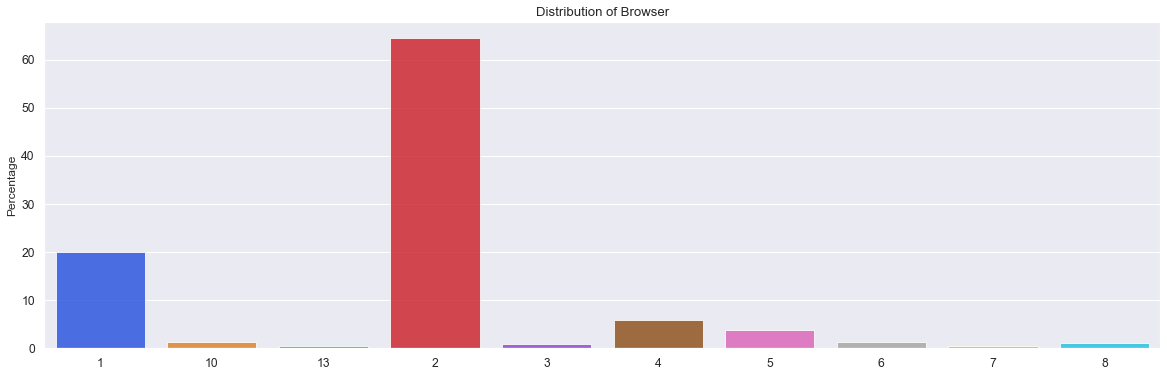

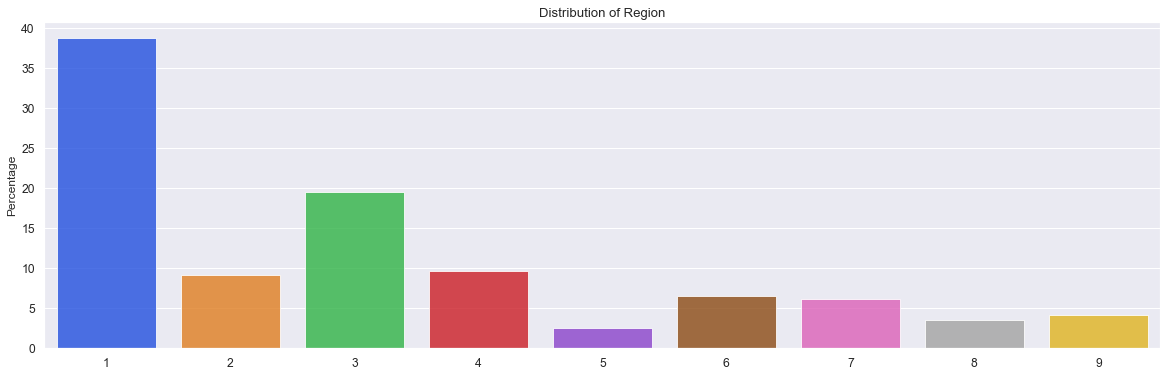

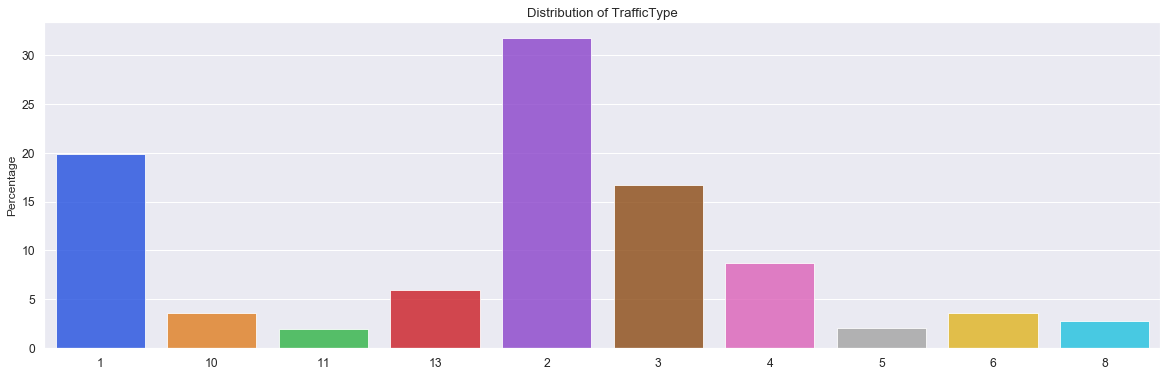

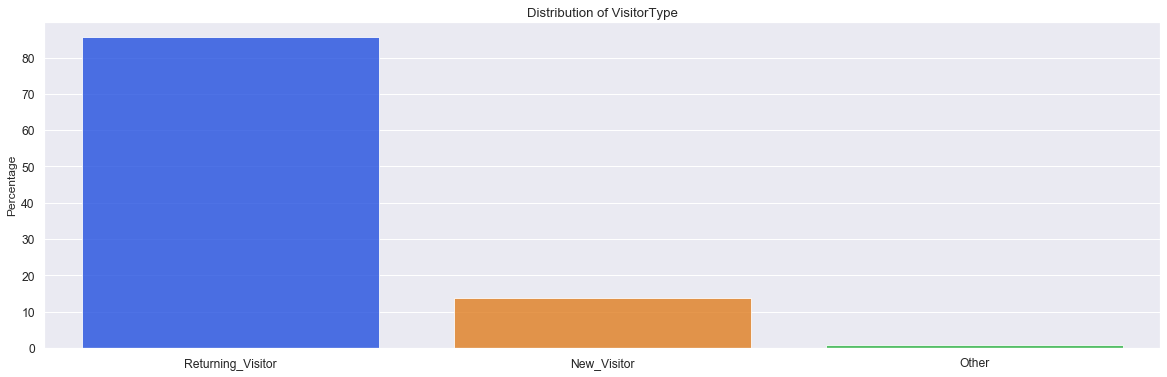

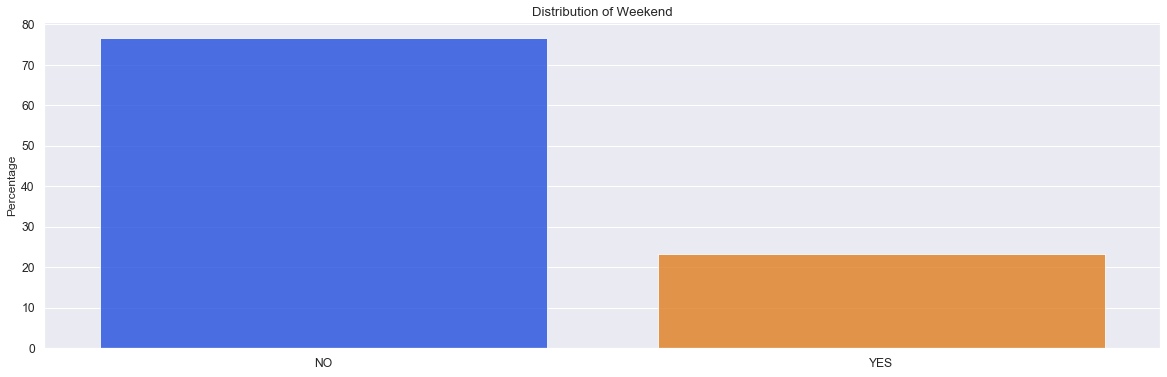

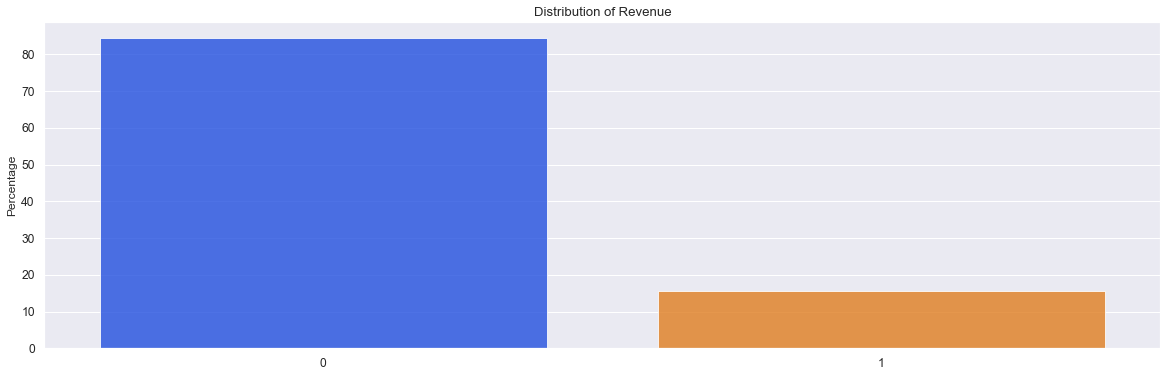

In [18]:
for var in categorical_feats:

    categorical_count  = train_data[var].value_counts(normalize=True).mul(100).round(2)
    categorical_count = categorical_count[:10,]
    sns.barplot(categorical_count.index, categorical_count.values ,  alpha=0.8)
    sns.set( palette="bright", font_scale=1.1, rc={"figure.figsize": [20, 6]})
    plt.title('Distribution of ' + var)
    plt.ylabel('Percentage', fontsize=12)
    #plt.xlabel(var, fontsize=12)
    plt.show()


### 5) Summary

In [19]:
train_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


### 6) Correlation matrix

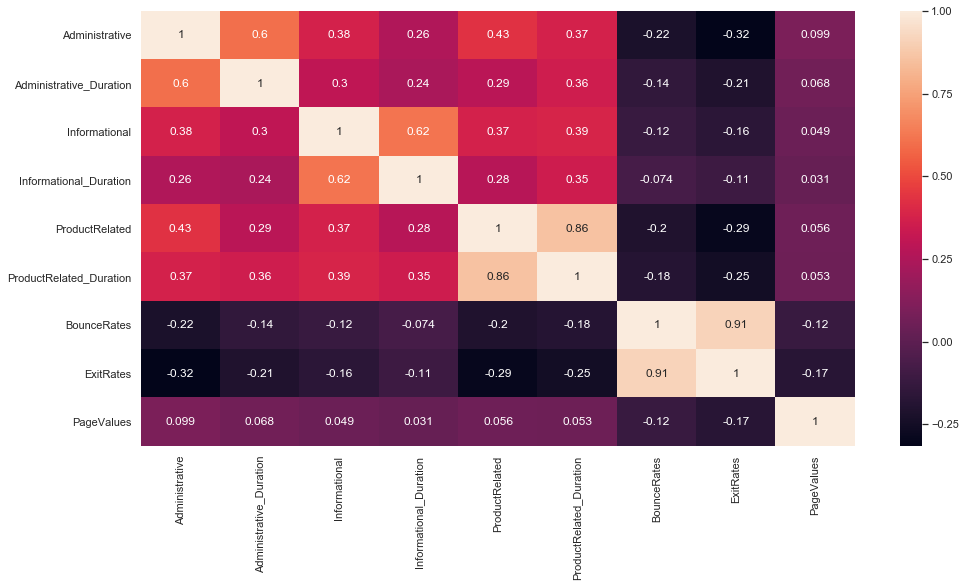

In [20]:
my_ff.correlation_matrix(train_data , numerical_feats) # Function from Functions_File

### 7) Bivariate Analysis

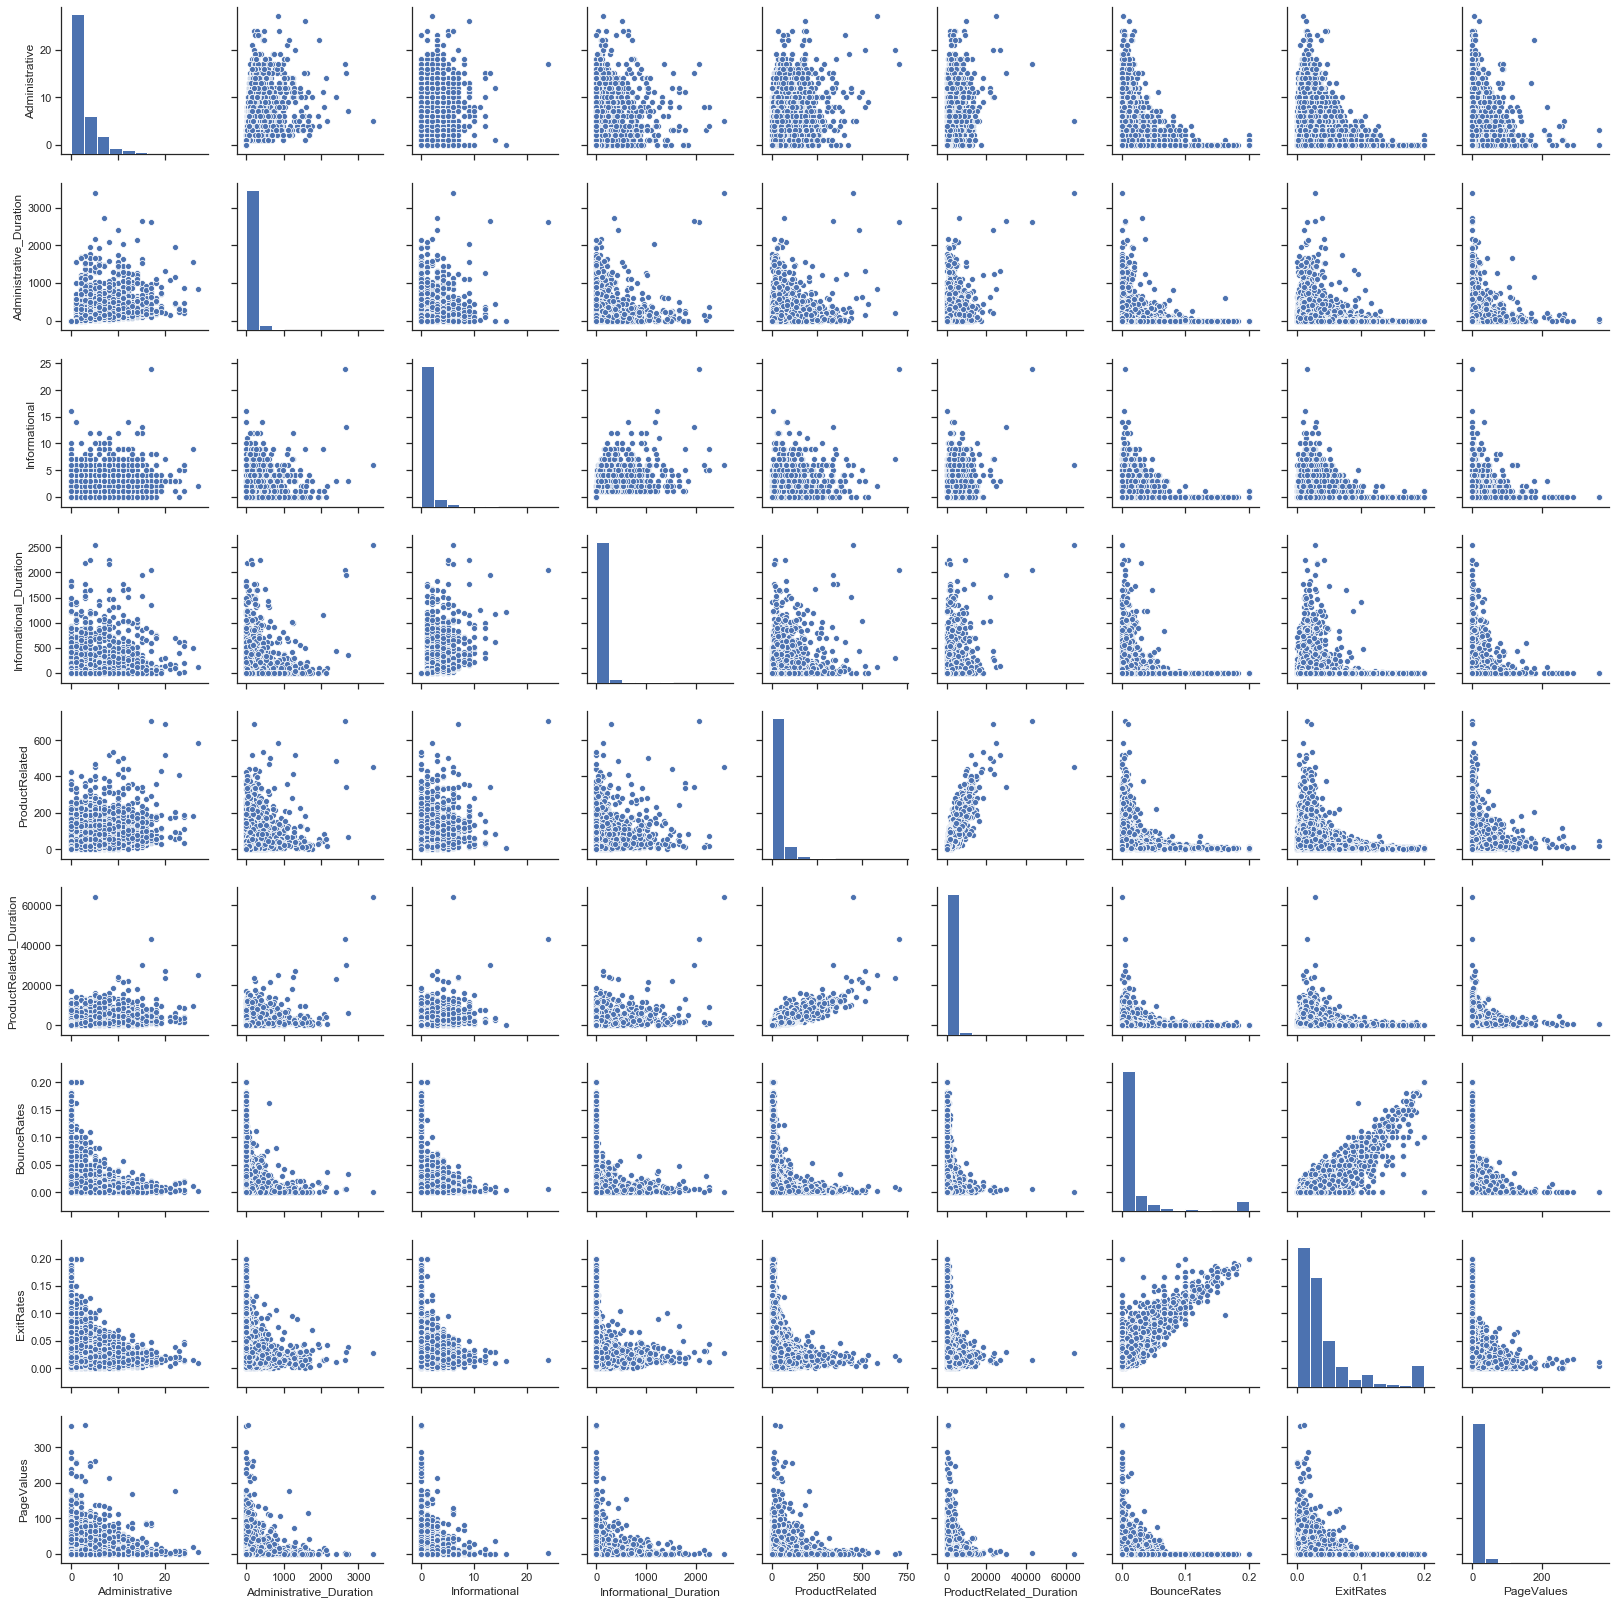

In [21]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train_data[numerical_feats ])

## Using Sidetable for more analysis 

### Distribution 

#### Numeric Features

In [22]:
for feat in numerical_feats:
    display(train_data.stb.freq([feat]))

,Administrative,count,percent,cumulative_count,cumulative_percent
0,0,5768,46.780211,5768,46.780211
1,1,1354,10.981346,7122,57.761557
2,2,1114,9.034874,8236,66.796431
3,3,915,7.420925,9151,74.217356
4,4,765,6.204380,9916,80.421736
5,5,575,4.663423,10491,85.085158
6,6,432,3.503650,10923,88.588808
7,7,338,2.741281,11261,91.330089
8,8,287,2.327656,11548,93.657745
9,9,225,1.824818,11773,95.482563


,Administrative_Duration,count,percent,cumulative_count,cumulative_percent
0,0.000000,5903,47.875101,5903,47.875101
1,4.000000,56,0.454177,5959,48.329278
2,5.000000,53,0.429846,6012,48.759124
3,7.000000,45,0.364964,6057,49.124088
4,11.000000,42,0.340633,6099,49.464720
...,...,...,...,...,...
3330,5.384615,1,0.008110,12326,99.967559
3331,5.066667,1,0.008110,12327,99.975669
3332,4.750000,1,0.008110,12328,99.983779
3333,4.333333,1,0.008110,12329,99.991890


,Informational,count,percent,cumulative_count,cumulative_percent
0,0,9699,78.661800,9699,78.661800
1,1,1041,8.442822,10740,87.104623
2,2,728,5.904298,11468,93.008921
3,3,380,3.081914,11848,96.090835
4,4,222,1.800487,12070,97.891322
5,5,99,0.802920,12169,98.694242
6,6,78,0.632603,12247,99.326845
7,7,36,0.291971,12283,99.618816
8,9,15,0.121655,12298,99.740470
9,8,14,0.113544,12312,99.854015


,Informational_Duration,count,percent,cumulative_count,cumulative_percent
0,0.000000,9925,80.494728,9925,80.494728
1,9.000000,33,0.267640,9958,80.762368
2,10.000000,26,0.210868,9984,80.973236
3,7.000000,26,0.210868,10010,81.184104
4,6.000000,26,0.210868,10036,81.394972
...,...,...,...,...,...
1253,7.600000,1,0.008110,12326,99.967559
1254,6.333333,1,0.008110,12327,99.975669
1255,3.500000,1,0.008110,12328,99.983779
1256,2.500000,1,0.008110,12329,99.991890


,ProductRelated,count,percent,cumulative_count,cumulative_percent
0,1,622,5.044607,622,5.044607
1,2,465,3.771290,1087,8.815896
2,3,458,3.714517,1545,12.530414
3,4,404,3.276561,1949,15.806975
4,6,396,3.211679,2345,19.018654
...,...,...,...,...,...
306,183,1,0.008110,12326,99.967559
307,177,1,0.008110,12327,99.975669
308,165,1,0.008110,12328,99.983779
309,163,1,0.008110,12329,99.991890


,ProductRelated_Duration,count,percent,cumulative_count,cumulative_percent
0,0.000000,755,6.123277,755,6.123277
1,17.000000,21,0.170316,776,6.293593
2,11.000000,17,0.137875,793,6.431468
3,8.000000,17,0.137875,810,6.569343
4,15.000000,16,0.129765,826,6.699108
...,...,...,...,...,...
9546,9.500000,1,0.008110,12326,99.967559
9547,5.333333,1,0.008110,12327,99.975669
9548,2.666667,1,0.008110,12328,99.983779
9549,2.333333,1,0.008110,12329,99.991890


,BounceRates,count,percent,cumulative_count,cumulative_percent
0,0.000000,5518,44.752636,5518,44.752636
1,0.200000,700,5.677210,6218,50.429846
2,0.066667,134,1.086780,6352,51.516626
3,0.028571,115,0.932685,6467,52.449311
4,0.050000,113,0.916464,6580,53.365775
...,...,...,...,...,...
1867,0.000071,1,0.008110,12326,99.967559
1868,0.000039,1,0.008110,12327,99.975669
1869,0.000038,1,0.008110,12328,99.983779
1870,0.000034,1,0.008110,12329,99.991890


,ExitRates,count,percent,cumulative_count,cumulative_percent
0,0.200000,710,5.758313,710,5.758313
1,0.100000,338,2.741281,1048,8.499594
2,0.050000,329,2.668289,1377,11.167883
3,0.033333,291,2.360097,1668,13.527981
4,0.066667,267,2.165450,1935,15.693431
...,...,...,...,...,...
4772,0.000292,1,0.008110,12326,99.967559
4773,0.000263,1,0.008110,12327,99.975669
4774,0.000262,1,0.008110,12328,99.983779
4775,0.000250,1,0.008110,12329,99.991890


,PageValues,count,percent,cumulative_count,cumulative_percent
0,0.000000,9600,77.858881,9600,77.858881
1,53.988000,6,0.048662,9606,77.907543
2,42.293068,3,0.024331,9609,77.931873
3,87.902961,2,0.016221,9611,77.948094
4,78.569599,2,0.016221,9613,77.964315
...,...,...,...,...,...
2699,0.120700,1,0.008110,12326,99.967559
2700,0.098621,1,0.008110,12327,99.975669
2701,0.093547,1,0.008110,12328,99.983779
2702,0.067050,1,0.008110,12329,99.991890


#### Categorical features

In [24]:
for feat in categorical_feats:
    display(train_data.stb.freq([feat]))

,SpecialDay,count,percent,cumulative_count,cumulative_percent
0,0.0,11079,89.854015,11079,89.854015
1,0.6,351,2.846715,11430,92.700730
2,0.8,325,2.635848,11755,95.336577
3,0.4,243,1.970803,11998,97.307380
4,0.2,178,1.443633,12176,98.751014
5,1.0,154,1.248986,12330,100.000000


,Month,count,percent,cumulative_count,cumulative_percent
0,May,3364,27.283049,3364,27.283049
1,Nov,2998,24.314680,6362,51.597729
2,Mar,1907,15.466342,8269,67.064071
3,Dec,1727,14.006488,9996,81.070560
4,Oct,549,4.452555,10545,85.523114
5,Sep,448,3.633414,10993,89.156529
6,Aug,433,3.511760,11426,92.668289
7,Jul,432,3.503650,11858,96.171938
8,June,288,2.335766,12146,98.507705
9,Feb,184,1.492295,12330,100.000000


,OperatingSystems,count,percent,cumulative_count,cumulative_percent
0,2,6601,53.536091,6601,53.536091
1,1,2585,20.965126,9186,74.501217
2,3,2555,20.721817,11741,95.223033
3,4,478,3.876723,12219,99.099757
4,8,79,0.640714,12298,99.740470
5,6,19,0.154096,12317,99.894566
6,7,7,0.056772,12324,99.951338
7,5,6,0.048662,12330,100.000000


,Browser,count,percent,cumulative_count,cumulative_percent
0,2,7961,64.566099,7961,64.566099
1,1,2462,19.967559,10423,84.533658
2,4,736,5.969181,11159,90.502839
3,5,467,3.787510,11626,94.290349
4,6,174,1.411192,11800,95.701541
5,10,163,1.321979,11963,97.023520
6,8,135,1.094891,12098,98.118410
7,3,105,0.851582,12203,98.969992
8,13,61,0.494728,12264,99.464720
9,7,49,0.397405,12313,99.862125


,Region,count,percent,cumulative_count,cumulative_percent
0,1,4780,38.767234,4780,38.767234
1,3,2403,19.489051,7183,58.256285
2,4,1182,9.586375,8365,67.842660
3,2,1136,9.213301,9501,77.055961
4,6,805,6.528792,10306,83.584753
5,7,761,6.171938,11067,89.756691
6,9,511,4.144363,11578,93.901054
7,8,434,3.519870,12012,97.420925
8,5,318,2.579075,12330,100.000000


,TrafficType,count,percent,cumulative_count,cumulative_percent
0,2,3913,31.735604,3913,31.735604
1,1,2451,19.878345,6364,51.613950
2,3,2052,16.642336,8416,68.256285
3,4,1069,8.669911,9485,76.926196
4,13,738,5.985401,10223,82.911598
5,10,450,3.649635,10673,86.561233
6,6,444,3.600973,11117,90.162206
7,8,343,2.781833,11460,92.944039
8,5,260,2.108678,11720,95.052717
9,11,247,2.003244,11967,97.055961


,VisitorType,count,percent,cumulative_count,cumulative_percent
0,Returning_Visitor,10551,85.571776,10551,85.571776
1,New_Visitor,1694,13.738848,12245,99.310624
2,Other,85,0.689376,12330,100.000000


,Weekend,count,percent,cumulative_count,cumulative_percent
0,NO,9462,76.739659,9462,76.739659
1,YES,2868,23.260341,12330,100.000000


,Revenue,count,percent,cumulative_count,cumulative_percent
0,0,10422,84.525547,10422,84.525547
1,1,1908,15.474453,12330,100.000000
